### DS9

Denominator and Denominator of PCC：Pearson Correlation Coefficient

### DS9

ピアソンの積率相関係数の分母と分子


#### 相関係数　（Correlation Coefficient）
<dl>
    <dt>相関係数</dt>
        <dd>2つの変数が直線でモデル化できるような線形の関係性の強さを示す指標</dd>
        <dd>-1 ~ 0 ~ 1　の実数値をとる</dd>
        <dd>1に近い値は「強い正の相関」、0で相関なし、-1に近い値は「強い負の相関」</dd>
</dl>



#### 標本相関係数 (sample correlation coefficient)

<dl>
    <dt>標本相関係数 (sample correlation coefficient)</dt>
        <dd>主に線形(linear)の相関を調べる</dd>
        <dd>ピアソンの積率相関係数 (PCC：Pearson Correlation Coefficient)は標本相関係数</dd>
        <dd>単に相関係数といった場合、通常はピアソンの積率相関係数を指す</dd>
</dl>

#### 順位相関係数 (rank correlation coefficient)

<dl>
    <dt>順位相関係数 (rank correlation coefficient)</dt>
        <dd>非線形の相関(non-linear)や単調増加/減少関係(monotonic)の相関関係を調べる</dd>
        <dd>スピアマンの順位相関係数 (Spearman's rank correlation coefficient)</dd>
        <dd>ケンドールの順位相関係数 (Kendall rank correlation coefficient、Kendall's τ coefficient)</dd>
        <dd>スピアマンの順位相関係数方がよく使われる</dd>
</dl>


#### ピアソンの積率相関
<dl>
    <dt>ピアソンの積率相関</dt>
        <dd>量的データ（比例尺度、間隔尺度）のみで計算可能であり、質的データ（順序尺度、名義尺度）では計算できない</dd>
        <dd>相関係数は-1から1までの実数を取り、相関係数が正の場合$x$が大きくなると$y$が大きくなる傾向となり、これを正の相関という。</dd>
        <dd>反対に相関係数が負の場合$x$が大きくなると$y$が小さくなる傾向となり、これを負の相関という。</dd>
        <dd>-1や1に近いほど強い相関がある。</dd>
        <dd>中程度の値の場合弱い相関といい、0の時は無双感という。</dd>
</dl>

相関係数 $r_{xy}$ は以下のように定義され、
$$ r_{xy} = \frac{S_{xy}}{S_xS_y} $$
$S_x$と$S_y$はおのおの$x$と$y$の標準偏差、$S_{xy}は共分散を表し、共分散は以下の式で計算できる。
$$ S_{xy} = \frac{\sum_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})}{n} $$


#### 意味と求める方法

- 「変数$x$の大きさ」は、「変数$x$の平均値からの偏差(=平均値を中心0にした場合の値、中心化した値)」
- 「変数$y$の大きさ」は、「変数$y$の平均値からの偏差」

として

- （変数$x$の偏差）ｘ（変数$y$の偏差）

を計算すると

- 変数$x$の偏差と変数$y$の偏差がどちらも大きい
- 符号が一致

という場合は

- 「大きい正の数値(正の相関)」

になる。逆に、

- 変数$x$の偏差と変数$y$の偏差がどちらも大きい
- 符号が逆
- 「大きい負の数値(負の相関)」

この計算を全データに対して行って足し合わせた上でデータ数で割る（=平均する）ことで、データ全体における相関が求められる。ここまでの計算を共分散(covariance)と呼ぶ。



#### アイスクリームの売上と1日の平均気温の例

|date|7/1|7/5|7/10|7/11|7/12|
|:-|:-|:-|:-|:-|:-|
|deg|30|27|28|29|26|
|sales|30|24|24|26|21|

ここで、

変数$x$を気温

変数$y$を売上とした場合





       deg  sales
deg    2.5    5.0
sales  5.0   11.0
標準偏差x：1.5811388300841898
標準偏差y：3.3166247903554
不偏共分散：5.0
相関係数：0.9534625892455924


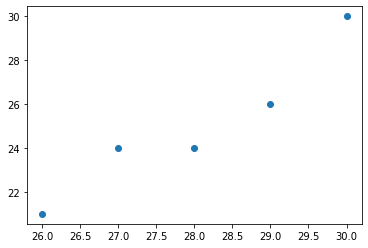

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame([['7/1', 30, 30],['7/5', 27, 24],['7/10', 28, 24],['7/11', 29, 26],['7/12', 26, 21]])
df.columns = ['date', 'deg', 'sales']

std_x = df['deg'].std()
std_y = df['sales'].std()
cov = df.cov()
print(cov)

s_xy = cov.loc['deg','sales']

print(f'標準偏差x：{std_x}')
print(f'標準偏差y：{std_y}')
print(f'不偏共分散：{s_xy}')

r_xy = s_xy / (std_x * std_y)

print(f'相関係数：{r_xy}')

plt.scatter(df['deg'], df['sales'])

- pandasのDataFrame.cov()を用いて共分散を求めると、行列が返される。
- Numpyのnp.cov()でも行列が返される。
- これは分散共分散行列(variance-covariance matrix)（単に共分散行列とも呼ばれる）と呼ばれるものである。
- np.cov() や df.cov() はn-1で割った不偏共分散と不偏分散を返す。

||deg|sales|
|:-|:-|:-|
|deg|2.5|5.0|
|sales|5.0|11.0|

それぞれの意味は

||deg|sales|
|:-|:-|:-|
|deg|degの不偏分散|degとsalesの不偏共分散|
|sales|degとsalesの不偏共分散|salesの不偏分散|
